<a href="https://colab.research.google.com/github/zaryif/Student-AI-Usage-predictor-SVM/blob/main/python_final_project_group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("ayeshasal89/ai-assistant-usage-in-student-life-synthetic")

Using Colab cache for faster access to the 'ai-assistant-usage-in-student-life-synthetic' dataset.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PROJECT-FINAL-PYTHON/ai_assistant_usage_student_life.csv')
print(df.head())
print(df.info())

      SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate        Psychology  2025-03-18   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   
3              3.70             1    Coding                   3   
4             28.12             9   Writing                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True       

In [ ]:
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)



/tmp/ipython-input-1309446619.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


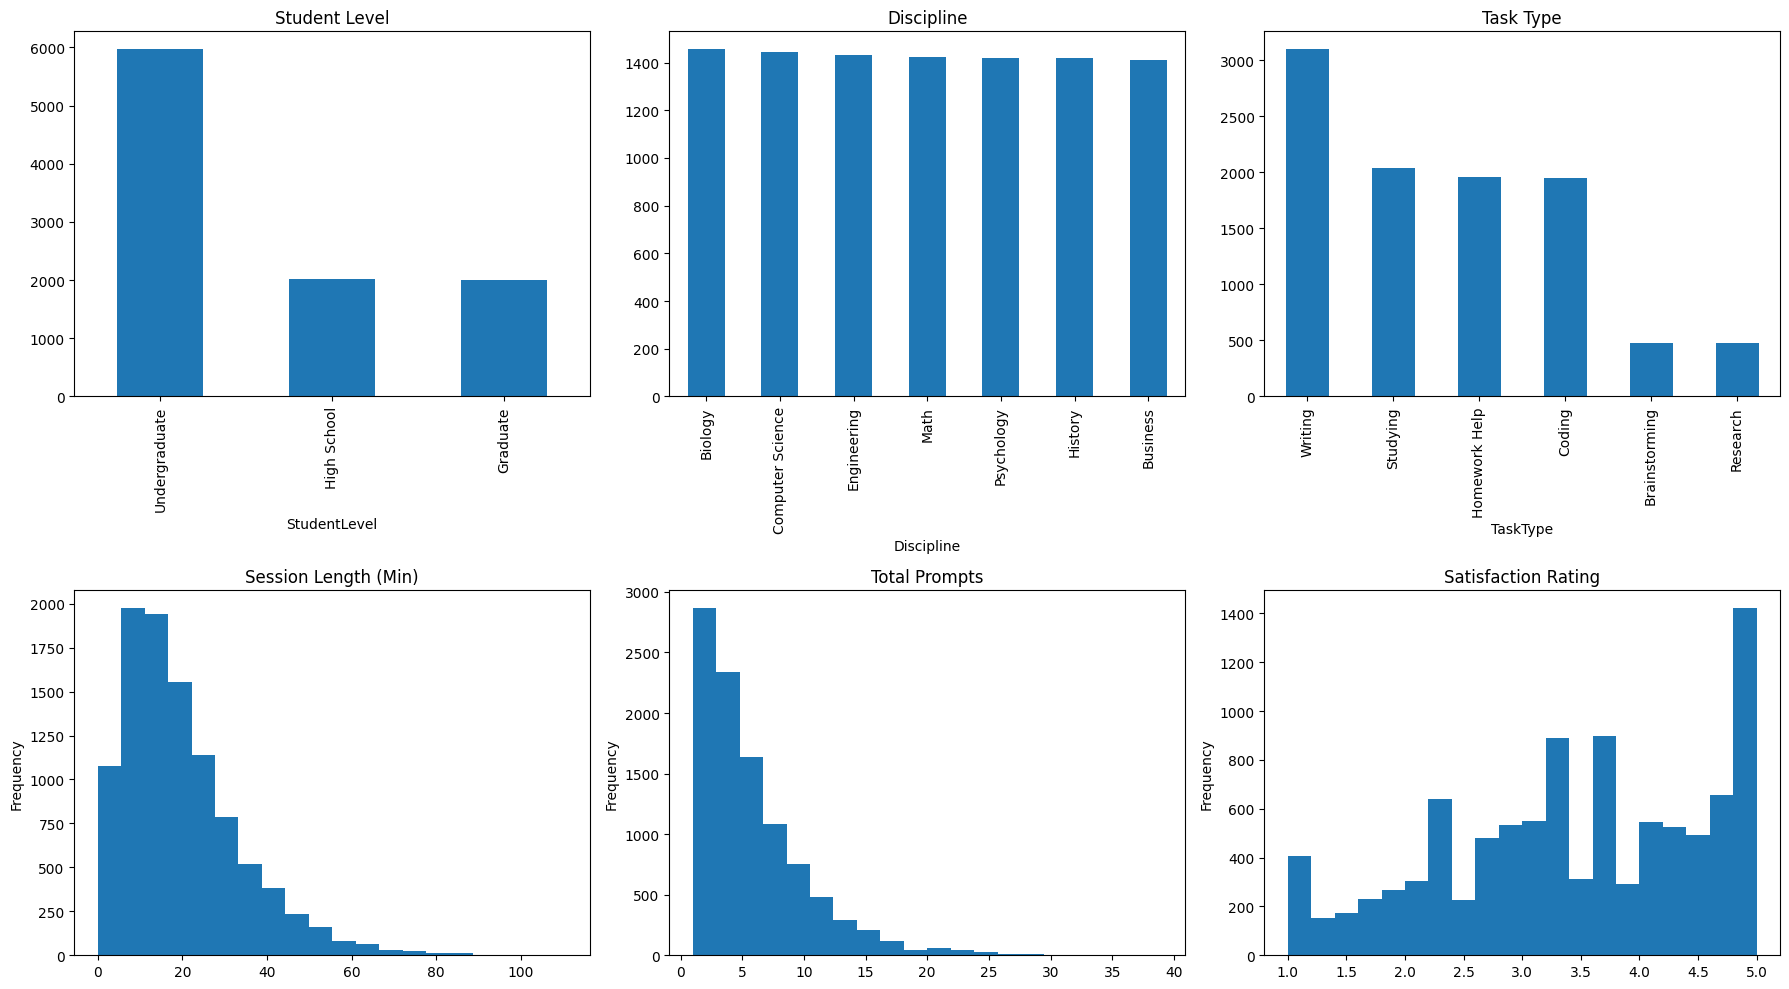

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

df['StudentLevel'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Student Level')
df['Discipline'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Discipline')
df['TaskType'].value_counts().plot(kind='bar', ax=axes[0, 2], title='Task Type')
df['SessionLengthMin'].plot(kind='hist', bins=20, ax=axes[1, 0], title='Session Length (Min)')
df['TotalPrompts'].plot(kind='hist', bins=20, ax=axes[1, 1], title='Total Prompts')
df['SatisfactionRating'].plot(kind='hist', bins=20, ax=axes[1, 2], title='Satisfaction Rating')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
categorical_cols = ['StudentLevel', 'Discipline', 'TaskType', 'FinalOutcome', 'UsedAgain']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['SessionID', 'SessionDate', 'FinalOutcome'])
y = df['FinalOutcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[ 0.75291532 -0.49335333  0.81700036  1.16004381  0.53660718 -1.49179855
   0.64469259 -2.11478578]
 [ 0.75291532  1.50483756 -0.48619544  0.08443527  0.53660718 -0.48348591
   0.64469259 -1.24010497]
 [ 0.75291532 -0.99290106 -0.04508057 -0.13068644 -1.24397188 -0.48348591
   0.64469259 -0.10301991]
 [ 0.75291532 -0.49335333 -1.16189994 -0.99117327 -1.24397188 -0.48348591
   0.64469259  0.07191626]
 [ 0.75291532  1.50483756  0.59536353  0.72980039  1.13013353 -0.48348591
   0.64469259 -0.45289223]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3327)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 8)
Test shape: (2000, 8)


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[850  73   0  21]
 [224  93   0  24]
 [ 89  45   0  10]
 [516  36   0  19]]


In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.50775
Test Accuracy: 0.481


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=10)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.489 0.492 0.491 0.498 0.485 0.481 0.499 0.487 0.475 0.488]
Mean Accuracy: 0.4885
